### <u><font color='brown'> Lead Scoring - Case Study </font></u>

#### Problem Statement : 
An X Education Company need help to select the most promising leads, i.e. the leads that are most likely to be converted to paying learners so that their marketing team may be optimally utilized. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Goals of Case Study : 

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- To Build a model, so that the Final model should be able to adjust if the company's requirement changes in the future. 


### <font color='blue'>STEP-1 : Importing required libraries and Data </font>

In [2]:
#Importing required libraries for the further analysis:
import numpy as np                                                      #Numpy Library
import pandas as pd                                                     #Pandas Library
import matplotlib.pyplot as plt                                         #visualisation libraries [Matplot & Seaborn]
import seaborn as sns
%matplotlib inline

In [3]:
#Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the dataset provided and loading into a dataframe
inp_leads= pd.read_csv("Leads.csv")

### <font color='blue'>STEP-2: Inspecting and understanding the Dataframe </font>

In [5]:
# Displaying the first 5 rows of the dataset
inp_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#verifying  the shape of the dataframe
inp_leads.shape

(9240, 37)

In [7]:
#For checking the statistical aspects of the dataframe
inp_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
inp_leads.dtypes.value_counts()   # count of different data types which states integer columns are higher.

object     30
float64     4
int64       3
dtype: int64

In [9]:
# for checking the information about the dataset and also for any missing values.
inp_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- As we observe there are some categorical variables which are to be created with dummy variables. 
- There are also some null values which are to be treated
-  We need to identify if there are any duplicates in the Prospect ID and Lead Number to be sure of our further analysis

In [10]:
#lets proceed to check the duplciates in prospect ID and lead number first
sum(inp_leads.duplicated(subset = 'Prospect ID'))==0

True

In [11]:
sum(inp_leads.duplicated(subset = 'Lead Number')) == 0

True

In [12]:
#for checking the duplicate rows in the given dataset
len(inp_leads[inp_leads.duplicated()])

0

<font color='brown'>Observations from Step-II </font> :
1. The given dataset has 9240 rows and 37 columns.
2. Dataset has columns of 3 data types int, float and object.
3. There are no duplicate rows in the dataset.
4. There are few missing values in some columns of the dataset which need to be handled.

### Exploratory Data Analysis

### <font color='blue'>STEP-3 : Data Cleaning  </font> 


#### 3.1 Identifying Missing Values 

In [13]:
# let us drop the columns 'Lead Number' and 'Prospect ID' as they are all unique values
inp_leads.drop(['Prospect ID', 'Lead Number'],1,inplace=True)

In [14]:
# checking the count of missing values in each column
inp_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
# Let us check the percentage of the missing values and sorting them in descending order for each column of dataset
round(100*(inp_leads.isnull().sum()/len(inp_leads.index)),2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

<font color='brown'>Comment</font> : 
As it is evident from the above output there are columns with high percentage of null values/ missing values. We will drop them as they are not helpful in generating insights by considering the threshold as 35%.



#### 3.2 Dropping Columns with missing values >=35%

In [16]:
cols1= inp_leads.columns         # assigning the columns list to a variable
cols1

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
# Dropping the columns which have more than missing values than the threshold percentage of 35%.
for col in cols1:
    if ((100*(inp_leads[col].isnull().sum()/len(inp_leads.index)))>=35):
        inp_leads.drop(col,1,inplace=True)

In [18]:
# Let us re-check the percentage of the missing values again
round(100*(inp_leads.isnull().sum()/len(inp_leads.index)),2).sort_values(ascending = False)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

In [19]:
inp_leads.shape  #rechecking the shape of dataset

(9240, 29)

#### 3.3 Categorical Attributes Analysis

-   ####  <font color='teal'> Verifying the Imbalanced Variables : </font>

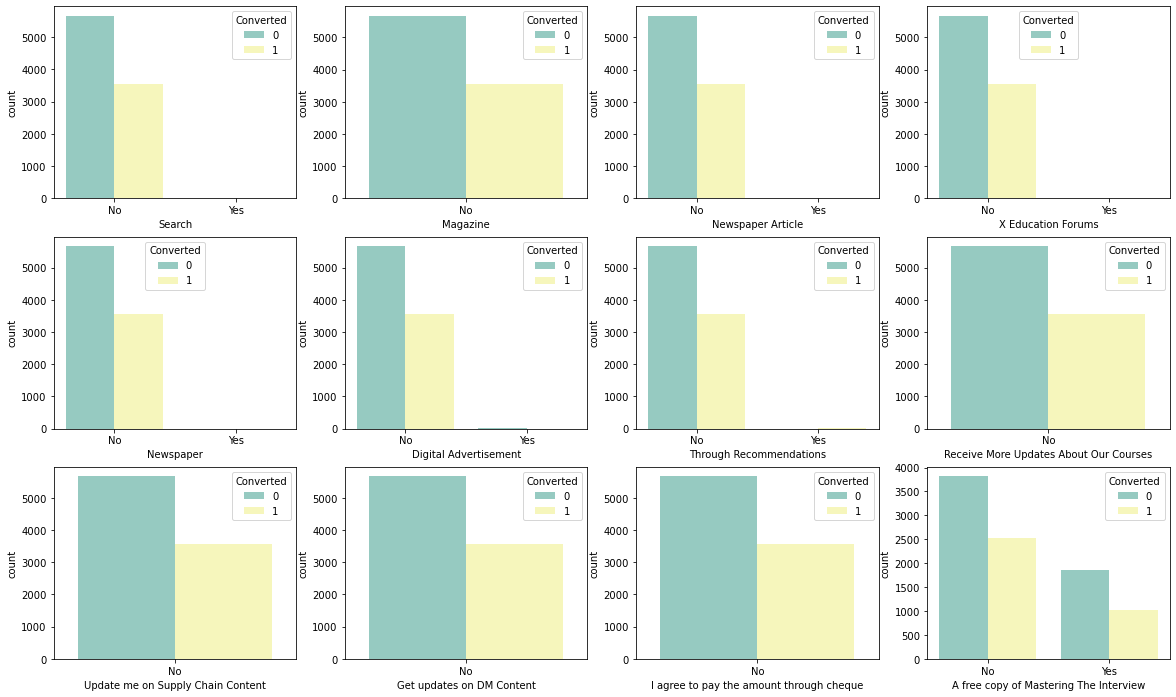

In [20]:
# Visualzing  categorical variables for any data imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = inp_leads, ax = axs[0,0],palette = 'Set3')
sns.countplot(x = "Magazine", hue = "Converted", data = inp_leads, ax = axs[0,1],palette = 'Set3')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = inp_leads, ax = axs[0,2],palette = 'Set3')
sns.countplot(x = "X Education Forums", hue = "Converted", data = inp_leads, ax = axs[0,3],palette = 'Set3')
sns.countplot(x = "Newspaper", hue = "Converted", data = inp_leads, ax = axs[1,0],palette = 'Set3')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = inp_leads, ax = axs[1,1],palette = 'Set3')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = inp_leads, ax = axs[1,2],palette = 'Set3')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = inp_leads, ax = axs[1,3],palette = 'Set3')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =inp_leads, ax = axs[2,0],palette = 'Set3')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = inp_leads, ax = axs[2,1],palette = 'Set3')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = inp_leads, ax = axs[2,2],palette = 'Set3')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = inp_leads, ax = axs[2,3],palette = 'Set3')
plt.show()

<font color='brown'>Comment</font> : 
- Among all the columns except 'A free copy of Mastering The Interview' column, remaining columns data is highly imbalanced, thus we will drop them
- "A free copy of Mastering The Interview" is a redundant variable ,so we will include this also in list of dropping columns

In [21]:
#creating a list of columns to be dropped
cols_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','How did you hear about X Education',
                  'I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview'])

 <font color='green'> <b>  'Lead Source' Column </b></font>

In [22]:
# Checking the value counts of Lead Source Column
inp_leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

It is evident that 'Google' is having the highest number of occurences, hence we will impute the missing values with label 'Google'

In [23]:
#replacing Nan Value with Google
inp_leads['Lead Source'] = inp_leads['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
inp_leads['Lead Source'] = inp_leads['Lead Source'].replace('google','Google')

In [24]:
#combining low frequency values to Others
inp_leads['Lead Source'] = inp_leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

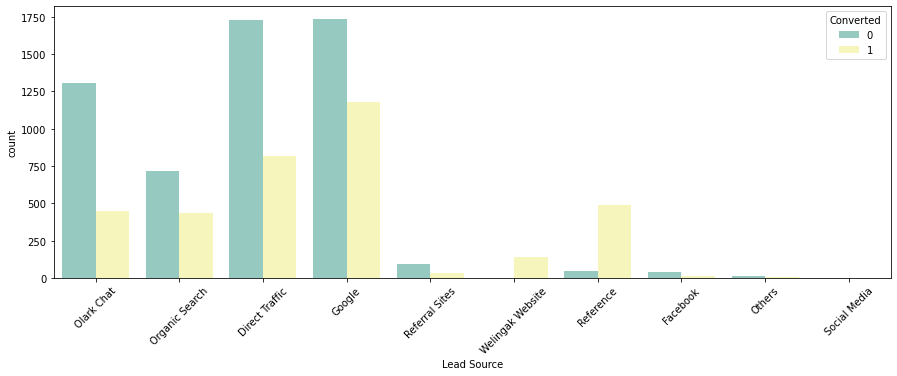

In [25]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =inp_leads , palette = 'Set3')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Inferences
- Maximum leads are generated by Google and Direct Traffic
- Conversion rate of Reference leads and Welinkgak Website leads is very high

 <font color='green'> <b>  'Country' Column </b></font>

In [26]:
#checking value counts of Country column
inp_leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Since the missing values are very high, we will impute all the missing values with 'not provided'

In [27]:
#Imputing missing values in Country column with "'not provided"
inp_leads['Country'] = inp_leads['Country'].replace(np.nan,'not provided')

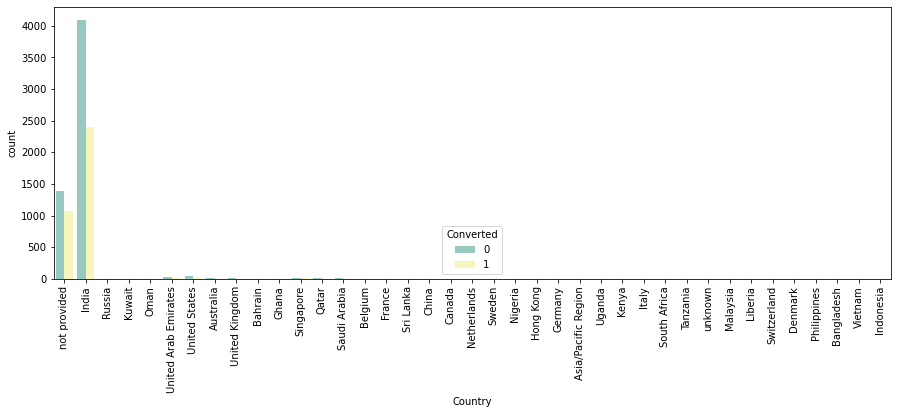

In [28]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =inp_leads , palette = 'Set3')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
- As we can see that most of the data points contains the value 'India' no inference can be drawn from this parameter
- Second majority values are not provided
- It is wise to drop this column

In [29]:
# Appending 'Country' to the list of columns to be dropped
cols_drop.append('Country')

# Let us check the list of columns to be dropped
print(cols_drop)

['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'How did you hear about X Education', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Country']


 <font color='green'> <b>  'What is your current occupation' Column </b></font>

In [30]:
#checking value counts of 'What is your current occupation' column
inp_leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since no information has been provided regarding occupation, we can replace missing values with new category 'Not provided'

In [31]:
#Creating new category 'Not provided'
inp_leads['What is your current occupation'] = inp_leads['What is your current occupation'].replace(np.nan,'Not Provided')

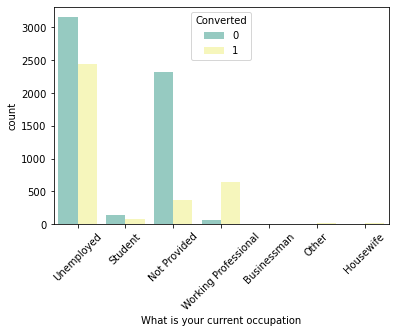

In [32]:
#visualizing count of Variable based on Converted value
s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = inp_leads , palette = 'Set3')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Inference
- Maximum leads are generated for the people whose current occupation is unemployed and they have a conversion rate more than 50%
- Conversion rate of working professionals is also very High

<font color='green'> <b>  'What matters most to you in choosing a course' Column </b></font> 

In [33]:
#checking value counts of 'What matters most to you in choosing a course'
inp_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

 Clearly seen that missing values in the this column can be imputed by 'Better Career Prospects'

In [34]:
#imputing nan values with Better career prospects
inp_leads['What matters most to you in choosing a course'] = inp_leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

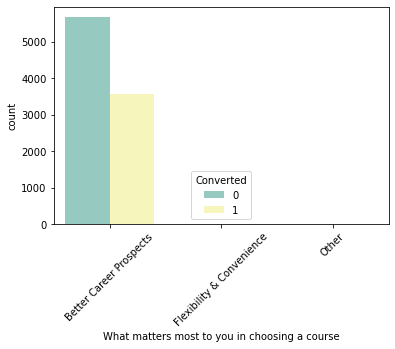

In [35]:
#visualizing count of Variable based on Converted value
s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = inp_leads , palette = 'Set3')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Since the column spread variance is very low, it can be dropped

In [36]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'How did you hear about X Education',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

<font color='green'> <b>  'Last Activity' Column </b></font> 

In [37]:
#checking value counts of Last Activity
inp_leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Missing values can be imputed with mode value "Email Opened"

In [38]:
#replacing Nan Values with mode value "Email Opened"
inp_leads['Last Activity'] = inp_leads['Last Activity'].replace(np.nan,'Email Opened')

In [39]:
#combining low frequency values
inp_leads['Last Activity'] = inp_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

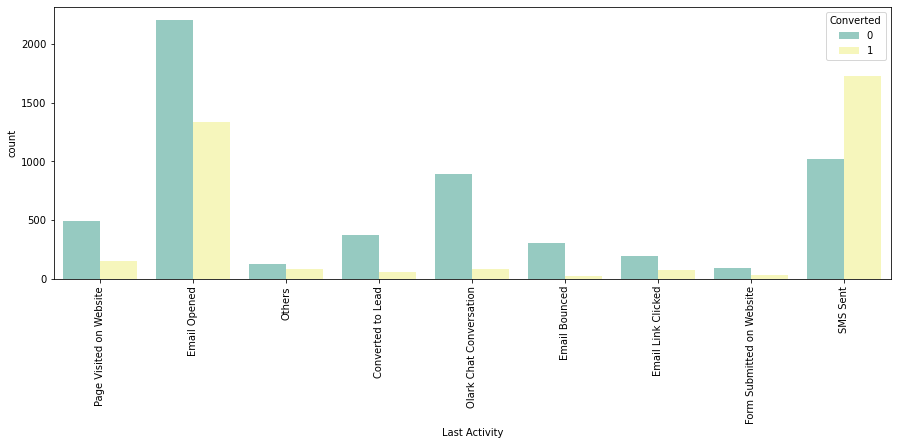

In [40]:
#visualizing count of Last Activity Variable 
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = inp_leads , palette = 'Set3')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
- Maximum leads are generated having last activity as Email Opened but the conversion rate is not so good
- SMS Sent as last activity has high conversion rate

In [41]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'How did you hear about X Education',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

<font color='green'> <b>  'How did you hear about X Education' Column </b></font>

In [42]:
#checking value counts of How did you hear about X Education
inp_leads['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [43]:
# We can replace the missing values with the mode 'Select'
inp_leads['How did you hear about X Education']= inp_leads['How did you hear about X Education'].replace(np.nan,"Select")

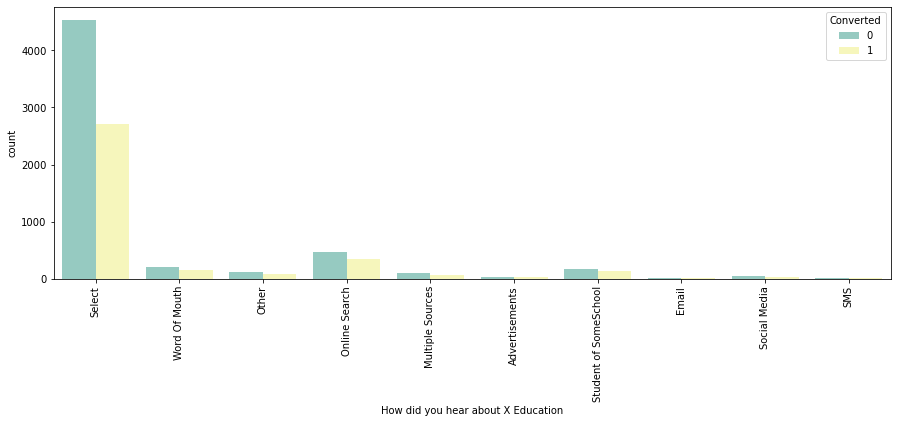

In [44]:
#visualizing count of How did you hear about X Education Variable 
plt.figure(figsize=(15,5))
s1=sns.countplot(x='How did you hear about X Education', hue='Converted' , data = inp_leads , palette = 'Set3')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inferences
- Online search and student of some school have better conversion rate 
- Most of them did not select any value as the select frequency is higher.

<font color='green'> <b>  'Lead Profile' Column </b></font>

In [45]:
#checking value counts of Lead Profile
inp_leads['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [46]:
#lets impute the Nan Values with select
inp_leads['Lead Profile']= inp_leads['Lead Profile'].replace(np.nan,"Select")

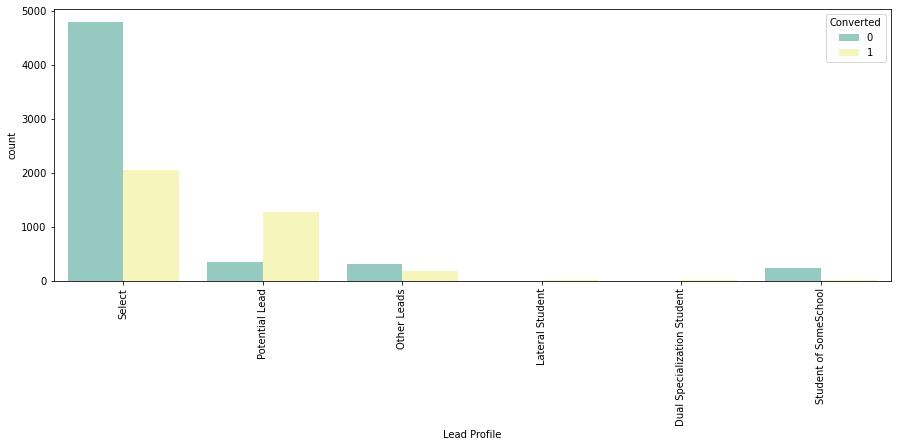

In [47]:
#visualizing count of Lead Profile 
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Lead Profile', hue='Converted' , data = inp_leads , palette = 'Set3')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inferences
- Potential lead has the highest conversion rates
- Select has the highest frequency 

In [48]:
# As the column spread variance is small, the same may be dropped
cols_drop.append('Lead Profile')

<font color='green'> <b>  'Specialization' Column </b></font>

In [49]:
#checking value counts of Specialization
inp_leads['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [50]:
#lets impute the Nan Values with select
inp_leads['Specialization']= inp_leads['Specialization'].replace(np.nan,"Select")

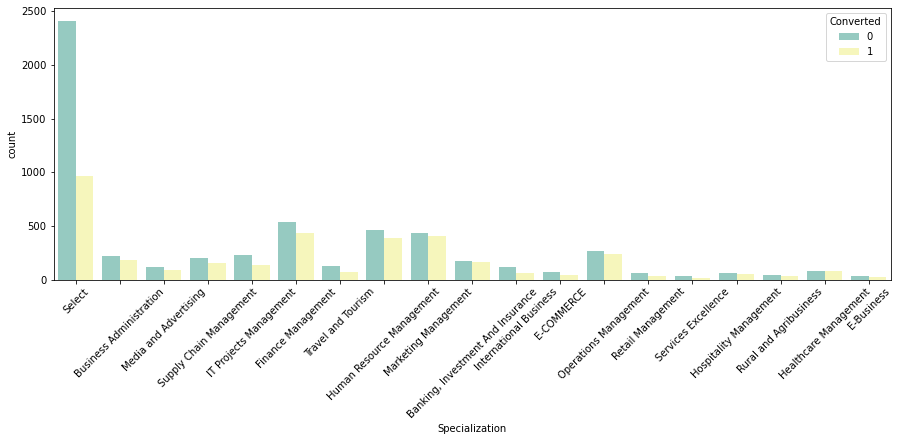

In [51]:
#visualizing count of Lead Profile 
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Specialization', hue='Converted' , data = inp_leads , palette = 'Set3')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Inferences
- IT Project Management, E Commerce , Human Resources Management, Travel and Tourism has the highest conversion
- Select has the highest frequency

In [52]:
# Since the highest frequency is select the analysis will be skewed . Hence we can drop the column specialization
cols_drop.append('Specialization')
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'How did you hear about X Education',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Lead Profile',
 'Specialization']

<font color='green'> <b>  'City' Column </b></font>

In [53]:
#checking value counts of City
inp_leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [54]:
#lets impute the Nan Values with select as the prospects have not selected the city
inp_leads['City']= inp_leads['City'].replace(np.nan,"Select")

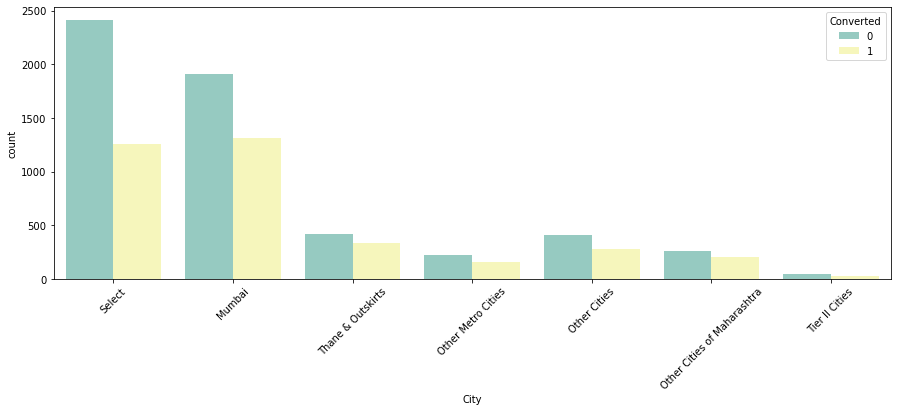

In [55]:
#visualizing count of City 
plt.figure(figsize=(15,5))
s1=sns.countplot(x='City', hue='Converted' , data = inp_leads , palette = 'Set3')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [56]:
# As the columns spread variance is very low the same can be dropped
cols_drop.append('City')

# Let us recheck the columns to be dropped
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'How did you hear about X Education',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Lead Profile',
 'Specialization',
 'City']

In [57]:
#Check the Null Values in All Columns after imputation:
round(100*(inp_leads.isnull().sum()/len(inp_leads.index)), 2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Lead Origin                                      0.00
Newspaper Article                                0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Lead Profile                                     0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Search                                           0.00
Magazine                                         0.00
Lead Source                                      0.00
What matters most to you in 

In [58]:
# Removing the rows which has missing values less than 2% we can drop those rows without affecting the analysis and regression
inp_leads= inp_leads.dropna()

In [59]:
#Check the Null Values in All Columns after imputation:
round(100*(inp_leads.isnull().sum()/len(inp_leads.index)), 2).sort_values(ascending = False)

Lead Origin                                      0.0
Magazine                                         0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Lead Profile                                     0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
Lead Source                                      0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
How did you hear about X Education            

In [60]:
inp_leads.shape  #rechecking the shape of dataset

(9103, 29)

<font color='green'> <b>  'Lead Origin' Column </b></font>

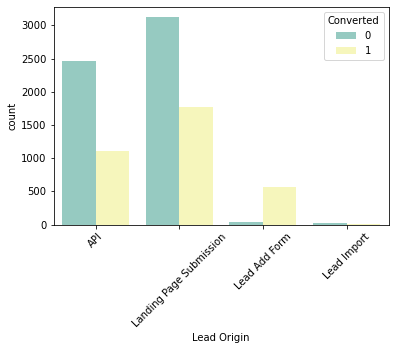

In [61]:
#visualizing count of Lead origin values
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = inp_leads , palette = 'Set3')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

<font color='green'> <b>  'Do Not Email & Do Not call' Column </b></font>

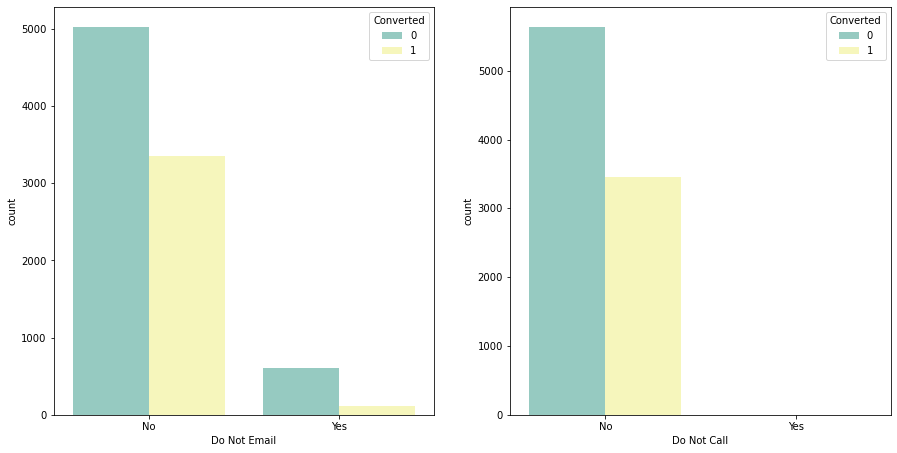

In [62]:
#visualizing counts of 'Do not email'  and 'do not call' columns
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = inp_leads, ax = axs[0],palette = 'Set3')
sns.countplot(x = "Do Not Call", hue = "Converted", data = inp_leads, ax = axs[1],palette = 'Set3')
plt.show()

We can append the Do Not Call Column to the list of Columns to be dropped as the data is highly skewed

In [63]:
#Appending 'Do Not Call' to the cols_to_drop List
cols_drop.append('Do Not Call')

# Checking updated list for cloumns to be dropped
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'How did you hear about X Education',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Lead Profile',
 'Specialization',
 'City',
 'Do Not Call']

<font color='green'> <b>  'Last Notable Activity' Column </b></font>

In [64]:
# Checking value counts of Last Notable Activity
inp_leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [65]:
# Since we have lower frequencies we can club them together as other
inp_leads['Last Notable Activity'] = inp_leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

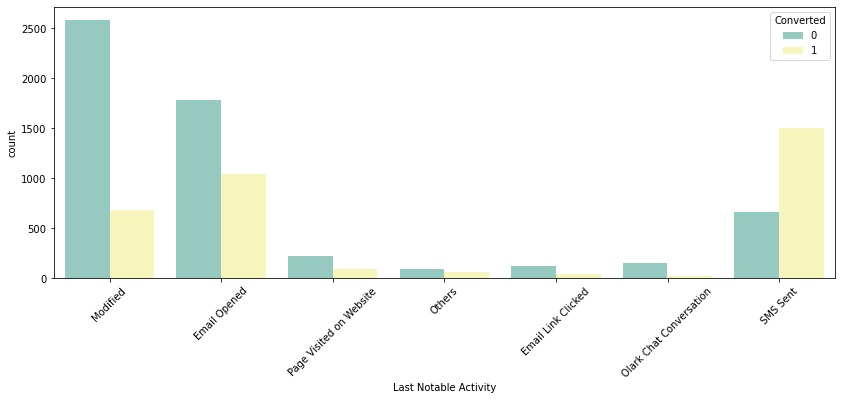

In [66]:
#visualizing count of Variable based on Converted value
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = inp_leads , palette = 'Set3')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
plt.show()

#### Inferences
- Maximum leads are generated having last activity as Email Opened but conversion rate is not too good
- SMS Sent as last acitvity has higher conversion rate

In [67]:
# Append 'Last Notable Activity' to the cols_to_drop list as this is a sales team generated data column
cols_drop.append('Last Notable Activity')

In [68]:
#let us check the columns which are to be dropped
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'How did you hear about X Education',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Lead Profile',
 'Specialization',
 'City',
 'Do Not Call',
 'Last Notable Activity']

In [69]:
# Let us do the dropping of the columns
leads_final=inp_leads.drop(cols_drop,1)

In [70]:
# Checking Info for the dataset
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 640.1+ KB


In [71]:
# Checking the head of the dataset
leads_final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


In [72]:
leads_final.shape      # re-checking the shape of dataset

(9103, 8)

<font color='brown'> Observations from above data cleaning step for categorical columns </font> :
1. Dropped around 6 columns which has missing value percentage above threshold % (taken 35% as threshold of missing value percentage). 
2. Imputed the values for missing values in the categorical columns with the mode value. 
3. Dropped the rows which has less than 2% of missing values.
3. Dropped the unnecessary and redundant columns by analysing with visualization of data in those columns.
4. After performing the above steps, the dataset has 9103 rows and 8columns.

#### 3.4 Numerical Attributes and their analysis using box plots

<font color='green'> <b>  'Converted' Column </b></font>

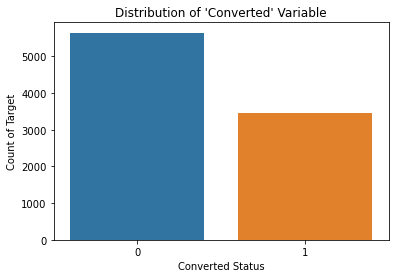

In [73]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(leads_final.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [74]:
# Finding out conversion rate
Converted_rate = (sum(leads_final['Converted'])/len(leads_final['Converted'].index))*100
Converted_rate

38.02043282434362

 We Understand the current lead conversion is 38% only

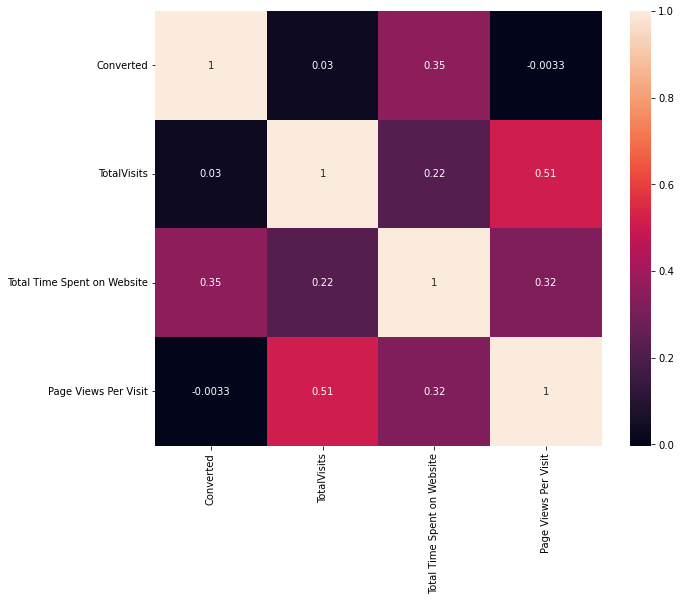

In [75]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads_final.corr(), annot=True)
plt.show()

<font color='green'> <b>  'Total Visits' Column </b></font>

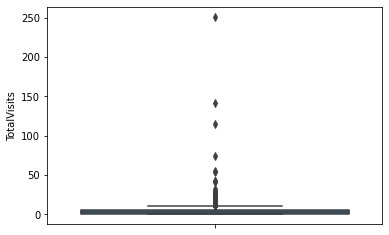

In [76]:
#visualizing spread of variable Total Visits
sns.boxplot(y=leads_final['TotalVisits'])
plt.show()

It is evident that there are outliers 

In [77]:
#checking percentile values for "Total Visits"
leads_final['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

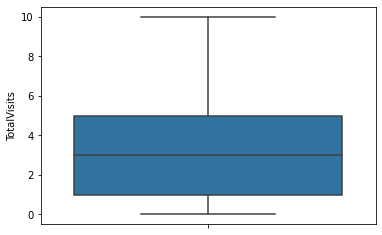

In [78]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads_final['TotalVisits'].quantile([0.05,0.95]).values
leads_final['TotalVisits'][leads_final['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_final['TotalVisits'][leads_final['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads_final['TotalVisits'])
plt.show()


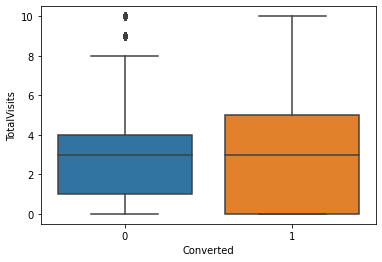

In [79]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_final)
plt.show()


#### Inferences
As the median for both  converted and not converted leads are same we cannnot infer anything on the basis of the total number of visits

<font color='green'> <b>  'Time Spent on website' Column </b></font>

In [80]:
#Checking percentiles for "Total Time Spent on Website"

leads_final['Total Time Spent on Website'].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

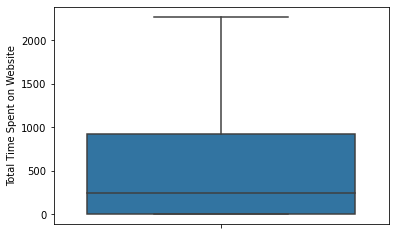

In [81]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads_final['Total Time Spent on Website'])
plt.show()

As there are no major outliers in the above data there is no requirement for outlier treatment

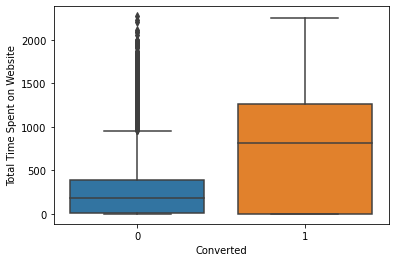

In [82]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_final)
plt.show()

#### Inference
As it is evident from the above plot that spending more time on the website the prospect is more likely to convert, thus website should be made more engaging to improve the conversion rate

<font color='green'> <b>  'Page Views per visit' Column </b></font>

In [83]:
#checking the statistical details of Page Views per visit column
leads_final['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

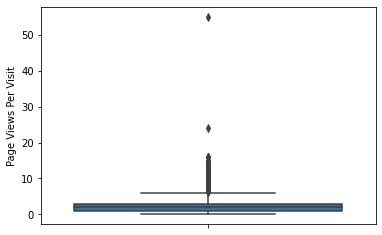

In [84]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads_final['Page Views Per Visit'])
plt.show()

As we observe that there are outliers from the above plot we have to treat for the outliers

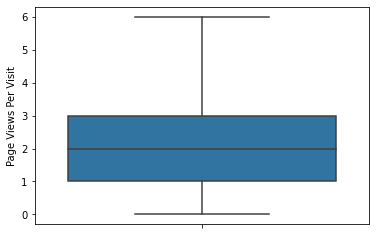

In [85]:
#Outlier Treatment: capping the outliers to 95% value for analysis

#Storing 5th Percentile and 95th percentile values
percentiles = leads_final['Page Views Per Visit'].quantile([0.05,0.95]).values

# Changing the values of all the values less than 5th Percentile to 5th percentile values
leads_final['Page Views Per Visit'][leads_final['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]


# Changing the values of all the values greater than 95th Percentile to 95th percentile values
leads_final['Page Views Per Visit'][leads_final['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads_final['Page Views Per Visit'])
plt.show()

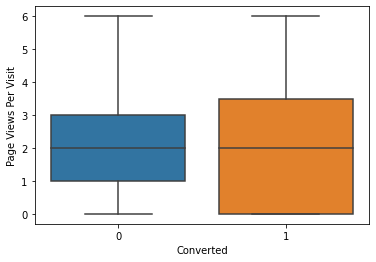

In [86]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_final)
plt.show()

#### Inferences
- Median for both converted and not converted leads has almost the same value
- Nothing conculsive can be said on the basis of Page Views per Visit


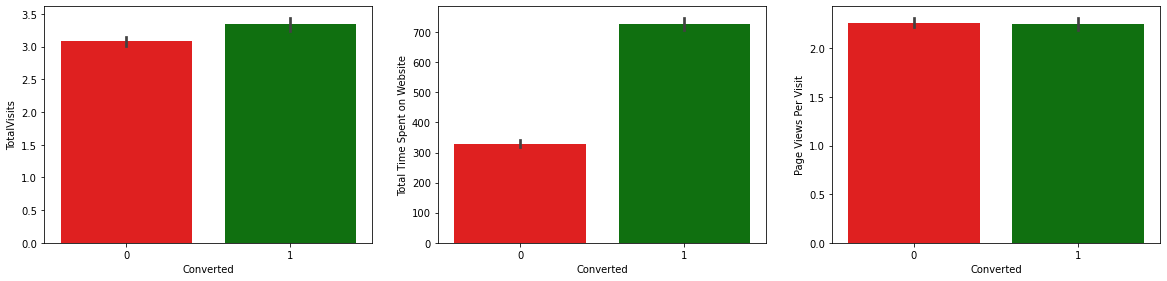

In [87]:
# Now check the conversions for all numeric values
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette=['r','g'], data = leads_final)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette= ['r','g'], data = leads_final)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette=['r','g'], data = leads_final)
plt.show()

<font color='brown'> Observations from above data cleaning step for Numerical columns </font> :
1. There are outliers in some columns which are verified by using box plots and handled them by flooring and capping method.
2. The conversion rate is high for Total Visits, Total time spent on Website and Page Views Per Visit columns.


### <font color='blue'>STEP-4: Data Preparation  </font> 


#### 4.1 Converting some binary variables (Yes/No) to 0/1

In [88]:
# List of variables to map
var_list =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_final[var_list] = leads_final[var_list].apply(binary_map)

In [89]:
leads_final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [90]:
leads_final.info()   #rechecking the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 640.1+ KB


#### 4.2 Dummy Variable Creation:



In [91]:
#getting a list of categorical columns foy creating dummy
cat_cols1= leads_final.select_dtypes(include=['object']).columns
cat_cols1

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [92]:
#getting dummies and dropping the first column and adding the results to the master dataframe
# dummies creation for 'lead origin' column
dummy = pd.get_dummies(leads_final[['Lead Origin']], drop_first=True)
leads_final = pd.concat([leads_final,dummy],1)

# dummies creation for 'lead source' column
dummy = pd.get_dummies(leads_final['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads_final = pd.concat([leads_final, dummy], axis = 1)

# dummies creation for 'What is your current occupation' column
dummy = pd.get_dummies(leads_final['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not Provided'], 1)
leads_final = pd.concat([leads_final, dummy], axis = 1)

In [93]:
#dropping the original columns after dummy variable creation
leads_final.drop(cat_cols1,1,inplace = True)

In [94]:
#checking dataset after dummy variable creation
leads_final.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [95]:
leads_final.columns  #checking the list of columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### <font color='blue'>STEP-5: Test-Train Split  </font>

In [96]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [97]:
# Putting feature variable to X
X=leads_final.drop('Converted', axis=1)

#checking first 5rows  of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [98]:
# Putting response variable to y
y = leads_final['Converted']

#checking first 5 rows of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [99]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


### <font color='blue'>STEP-6:  Feature Scaling  </font> 

In [100]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [101]:
#scaling of features
scaler = StandardScaler()

num_cols1=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols1] = scaler.fit_transform(X_train[num_cols1])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.068258,1.476324,-0.423364,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,1.362470,-0.771066,2.083179,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.647106,-0.571257,0.133646,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.435517,1.393834,0.690655,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
#Checking the conversion rate from 'converted' column as it denotes the target variable
(sum(y)/len(y.index))*100

38.02043282434362

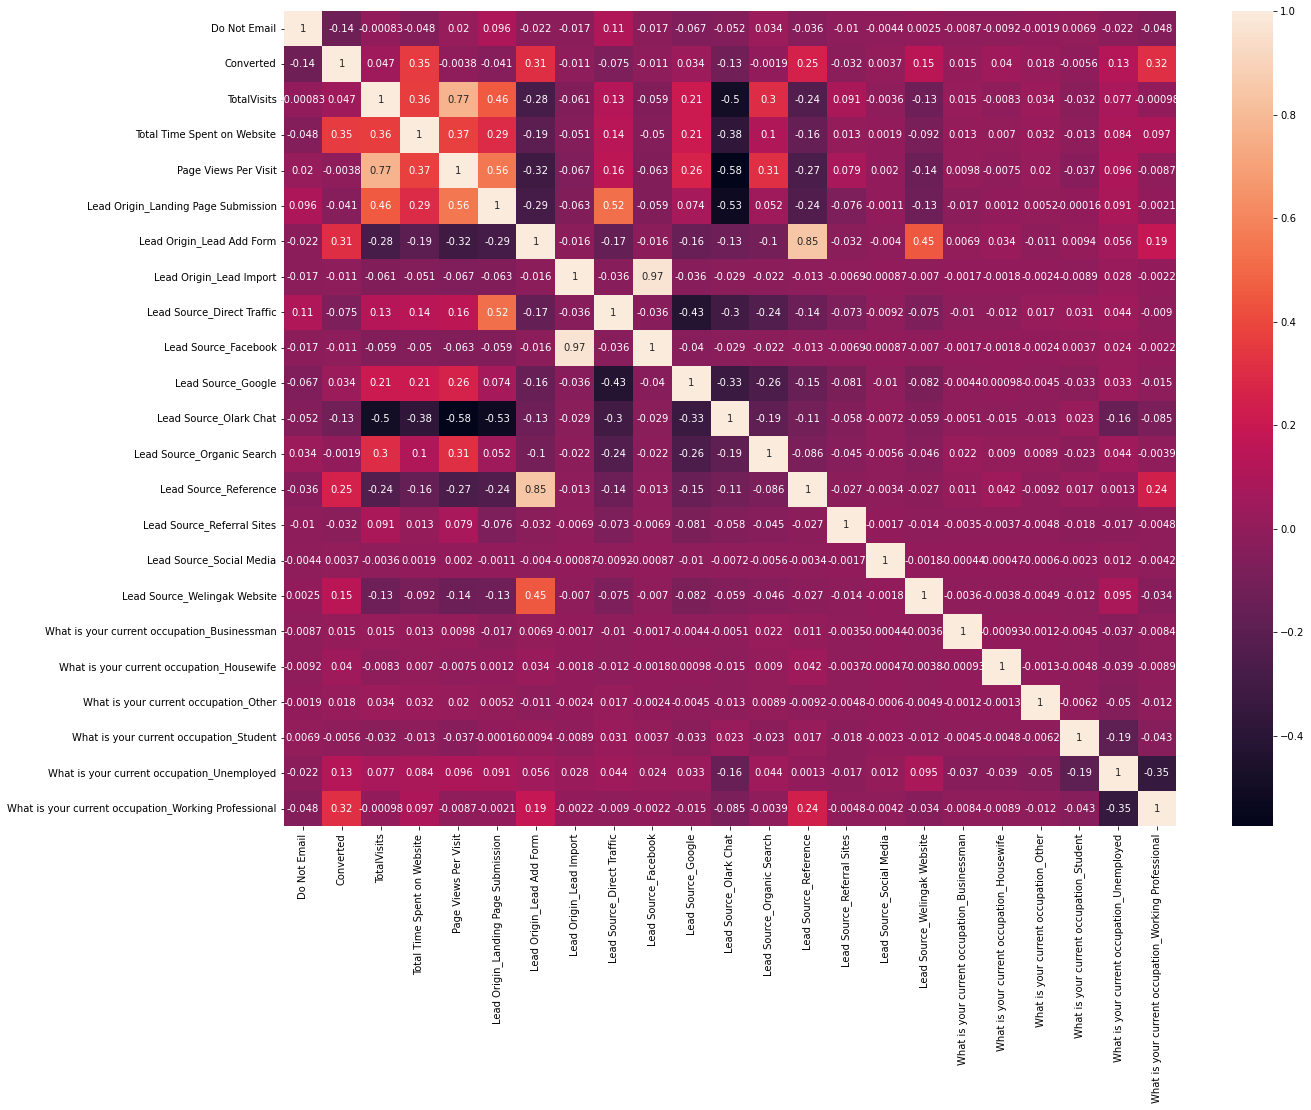

In [103]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads_final.corr(),annot = True)
plt.show()

There are some variables with high co-relation, and the same may be dropped 

In [104]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

### <font color='blue'>Step-7: Model Building using Stats Model & RFE  </font> 

In [105]:
# importing necessary library
import statsmodels.api as sm

In [106]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [107]:
rfe.support_

array([ True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True])

In [108]:
# Let us check the coloumns and their rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [109]:
#list of RFE supported columns
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [110]:
# Removing the coloumns from the data frame which are not supporting RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Social Media'],
      dtype='object')

<font color='green'> <b> Model- I </b></font>

In [111]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.8
Date:                Sat, 25 Feb 2023   Deviance:                       5725.6
Time:                        13:13:59   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3490
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2420      0.096    -12.979      0.000      -1.430      -1.054
Do Not Email                                            -0.3583      0.043     -8.295      0.000      -0.443      -0.274
Total Time Spent on Website                              1.0998      0.038     28.576      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1642      0.774      5.379      0.000       2.647       5.682
Lead Source_Direct Traffic                              -1.0592      0.108     -9.834      0.000      -1.270      -0.848
Lead Source_Google                                      -0.7850      0.103     -7.616      0.000      -0.987      -0.583
Lead Source_Organic Search                              -0.8803      0.124     -7.094      0.000      -1.123      -0.637
Lead Source_Reference                                   -1.3303      0.806     -1.650      0.099      -2.911       0.250
Lead Source_Referral Sites                              -1.3703      0.336     -4.075      0.000      -2.029      -0.711
Lead Source_Welingak Website                             0.7219      1.055      0.684      0.494      -1.347       2.790
What is your current occupation_Businessman              1.5018      0.999      1.503      0.133      -0.456       3.460
What is your current occupation_Housewife               23.8830    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                    1.3577      0.641      2.118      0.034       0.101       2.614
What is your current occupation_Student                  1.1827      0.225      5.268      0.000       0.743       1.623
What is your current occupation_Unemployed               1.3095      0.083     15.683      0.000       1.146       1.473
What is your current occupation_Working Professional     3.8054      0.189     20.105      0.000       3.434       4.176
========================================================================================================================
"""

<font color='brown'>Observations</font> : <br/>

P Value of variable what is your current occupation_housewife and Lead origin_lead add form are high. So we can drop them


In [112]:
#dropping column with high VIF value 
col1 = col1.drop('What is your current occupation_Housewife',1)

<font color='green'> <b> Model- II </b></font>

In [113]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.3
Date:                Sat, 25 Feb 2023   Deviance:                       5744.6
Time:                        13:14:00   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2247      0.095    -12.862      0.000      -1.411      -1.038
Do Not Email                                            -0.3597      0.043     -8.331      0.000      -0.444      -0.275
Total Time Spent on Website                              1.0996      0.038     28.619      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1662      0.774      5.381      0.000       2.649       5.684
Lead Source_Direct Traffic                              -1.0517      0.108     -9.778      0.000      -1.262      -0.841
Lead Source_Google                                      -0.7756      0.103     -7.540      0.000      -0.977      -0.574
Lead Source_Organic Search                              -0.8645      0.124     -6.984      0.000      -1.107      -0.622
Lead Source_Reference                                   -1.3089      0.806     -1.623      0.105      -2.889       0.272
Lead Source_Referral Sites                              -1.3681      0.336     -4.072      0.000      -2.027      -0.710
Lead Source_Welingak Website                             0.7294      1.055      0.691      0.490      -1.339       2.798
What is your current occupation_Businessman              1.4744      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3321      0.641      2.079      0.038       0.076       2.588
What is your current occupation_Student                  1.1579      0.224      5.160      0.000       0.718       1.598
What is your current occupation_Unemployed               1.2836      0.083     15.498      0.000       1.121       1.446
What is your current occupation_Working Professional     3.7795      0.189     19.999      0.000       3.409       4.150
========================================================================================================================
"""

<font color='brown'>Observations</font> : <br/>
1. Lead Source_Welingak Website has the high P value, so we can drop that for stable model.


In [114]:
#dropping column with high p-value
col1 = col1.drop('Lead Source_Welingak Website',1)

<font color='green'> <b> Model- III </b></font>

In [115]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.5
Date:                Sat, 25 Feb 2023   Deviance:                       5745.1
Time:                        13:14:00   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2215      0.095    -12.847      0.000      -1.408      -1.035
Do Not Email                                            -0.3606      0.043     -8.350      0.000      -0.445      -0.276
Total Time Spent on Website                              1.1006      0.038     28.654      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6079      0.523      8.807      0.000       3.582       5.633
Lead Source_Direct Traffic                              -1.0559      0.107     -9.832      0.000      -1.266      -0.845
Lead Source_Google                                      -0.7818      0.103     -7.623      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8687      0.124     -7.026      0.000      -1.111      -0.626
Lead Source_Reference                                   -1.7536      0.564     -3.109      0.002      -2.859      -0.648
Lead Source_Referral Sites                              -1.3724      0.336     -4.085      0.000      -2.031      -0.714
What is your current occupation_Businessman              1.4745      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3324      0.641      2.080      0.038       0.077       2.588
What is your current occupation_Student                  1.1571      0.225      5.154      0.000       0.717       1.597
What is your current occupation_Unemployed               1.2843      0.083     15.505      0.000       1.122       1.447
What is your current occupation_Working Professional     3.7806      0.189     20.002      0.000       3.410       4.151
========================================================================================================================
"""

<font color='brown'>Observations</font> : <br/>
1. 'What is your current occupation_Businessman	' has the high P value, so we can drop that for stable model.


In [116]:
#dropping column with high p-value
col1 = col1.drop('What is your current occupation_Businessman',1)

<font color='green'> <b> Model- IV </b></font>

In [117]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.5
Date:                Sat, 25 Feb 2023   Deviance:                       5747.1
Time:                        13:14:01   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3468
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2155      0.095    -12.809      0.000      -1.401      -1.030
Do Not Email                                            -0.3610      0.043     -8.360      0.000      -0.446      -0.276
Total Time Spent on Website                              1.1004      0.038     28.661      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6094      0.523      8.810      0.000       3.584       5.635
Lead Source_Direct Traffic                              -1.0547      0.107     -9.823      0.000      -1.265      -0.844
Lead Source_Google                                      -0.7815      0.103     -7.622      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8655      0.124     -7.003      0.000      -1.108      -0.623
Lead Source_Reference                                   -1.7436      0.564     -3.091      0.002      -2.849      -0.638
Lead Source_Referral Sites                              -1.3729      0.336     -4.087      0.000      -2.031      -0.715
What is your current occupation_Other                    1.3254      0.641      2.069      0.039       0.070       2.581
What is your current occupation_Student                  1.1497      0.224      5.122      0.000       0.710       1.590
What is your current occupation_Unemployed               1.2770      0.083     15.469      0.000       1.115       1.439
What is your current occupation_Working Professional     3.7733      0.189     19.975      0.000       3.403       4.143
========================================================================================================================
"""

<font color='brown'>Observations</font> : <br/>
1. 'What is your current occupation_Other' has the high P value, so we can drop that for stable model.


In [118]:
#dropping column with high p-value
col1 = col1.drop('What is your current occupation_Other',1)

<font color='green'> <b> Model- V </b></font>

In [119]:
#BUILDING MODEL #5
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2875.6
Date:                Sat, 25 Feb 2023   Deviance:                       5751.2
Time:                        13:14:02   Pearson chi2:                 6.43e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3464
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2020      0.094    -12.723      0.000      -1.387      -1.017
Do Not Email                                            -0.3600      0.043     -8.348      0.000      -0.445      -0.276
Total Time Spent on Website                              1.1023      0.038     28.710      0.000       1.027       1.178
Lead Origin_Lead Add Form                                4.6119      0.523      8.816      0.000       3.587       5.637
Lead Source_Direct Traffic                              -1.0496      0.107     -9.783      0.000      -1.260      -0.839
Lead Source_Google                                      -0.7804      0.102     -7.615      0.000      -0.981      -0.580
Lead Source_Organic Search                              -0.8639      0.124     -6.987      0.000      -1.106      -0.622
Lead Source_Reference                                   -1.7425      0.564     -3.089      0.002      -2.848      -0.637
Lead Source_Referral Sites                              -1.3749      0.336     -4.094      0.000      -2.033      -0.717
What is your current occupation_Student                  1.1342      0.224      5.057      0.000       0.695       1.574
What is your current occupation_Unemployed               1.2613      0.082     15.384      0.000       1.101       1.422
What is your current occupation_Working Professional     3.7575      0.189     19.919      0.000       3.388       4.127
========================================================================================================================
"""

#### Calculating VIF

In [120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,3.81
6,Lead Source_Reference,3.63
9,What is your current occupation_Unemployed,2.58
4,Lead Source_Google,1.70
3,Lead Source_Direct Traffic,1.67
5,Lead Source_Organic Search,1.31
10,What is your current occupation_Working Profes...,1.29
1,Total Time Spent on Website,1.12
8,What is your current occupation_Student,1.05
0,Do Not Email,1.03


<font color='brown'>Observations</font> : <br/>
1. Model no 5 seems to be stable with significant P values, we shall go ahead with this model for further analysis
2. VIF values are under threshold values. <br/>
We need not drop any more variables and we can proceed with making predictions with this model

### Prediciting the train model


In [121]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.733427
5520    0.150019
1962    0.223565
1566    0.968245
9170    0.308725
5097    0.112311
8954    0.254701
309     0.258253
5519    0.112311
1050    0.648854
dtype: float64

In [122]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73342692, 0.15001897, 0.22356515, 0.96824499, 0.30872547,
       0.11231116, 0.25470142, 0.25825332, 0.11231116, 0.64885439])

In [123]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.733427,7962
1,0,0.150019,5520
2,0,0.223565,1962
3,1,0.968245,1566
4,0,0.308725,9170


In [124]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.733427,7962,1
1,0,0.150019,5520,0
2,0,0.223565,1962,0
3,1,0.968245,1566,1
4,0,0.308725,9170,0


### <font color='blue'>Step-8: Model Evaluation  </font> 

In [125]:
# Importing library needed for evaluation process
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3550  403]
 [ 849 1570]]


In [126]:
# for checking the accuracy score
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8035153797865662


In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Calculating the sensitivity of the logistic regression model
TP / float(TP+FN)

0.649028524183547

In [129]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10194788768024285


In [130]:
# positive predictive value 
print (TP / float(TP+FP))

0.7957425240750127


In [131]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8070015912707433


<font color='green'> <b> ROC Curve </b></font>

In [132]:
# defining the ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

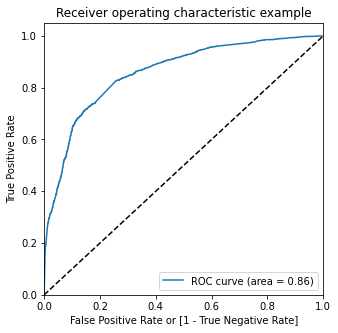

In [134]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

<font color='brown'>Observations</font> : <br/>
Generally the ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [135]:
# Creating  columns with different probability cutoffs 
numbers1 = [float(x)/10 for x in range(10)]
for i in numbers1:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.733427,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.150019,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.223565,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.968245,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.308725,9170,0,1,1,1,1,0,0,0,0,0,0


In [141]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df1 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num1 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num1:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df1)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.515694  0.981811  0.230458
0.2   0.2  0.690521  0.906573  0.558310
0.3   0.3  0.770559  0.828855  0.734885
0.4   0.4  0.801946  0.700703  0.863901
0.5   0.5  0.803515  0.649029  0.898052
0.6   0.6  0.780917  0.560976  0.915507
0.7   0.7  0.759102  0.466308  0.938275
0.8   0.8  0.733992  0.353865  0.966608
0.9   0.9  0.690207  0.192642  0.994688


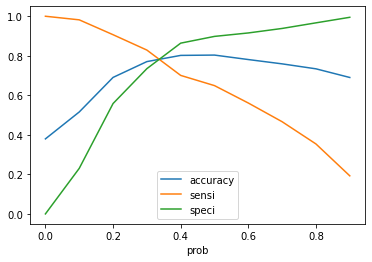

In [137]:
# Plotting the accuracy sensitivity and specificity for various probabilities.
cutoff_df1.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color='brown'>Observations</font> : <br/>
  From the curve above,we can infer that appx 0.37 is the optimum point to take it as a cutoff probability.

In [140]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,0,0.733427,7962,1,1,1,1,1,1,1,1,1,0,0,1,73
1,0,0.150019,5520,0,1,1,0,0,0,0,0,0,0,0,0,15
2,0,0.223565,1962,0,1,1,1,0,0,0,0,0,0,0,0,22
3,1,0.968245,1566,1,1,1,1,1,1,1,1,1,1,1,1,97
4,0,0.308725,9170,0,1,1,1,1,0,0,0,0,0,0,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,0,0.140939,367,0,1,1,0,0,0,0,0,0,0,0,0,14
6368,1,0.844251,82,1,1,1,1,1,1,1,1,1,1,0,1,84
6369,1,0.895071,8173,1,1,1,1,1,1,1,1,1,1,0,1,90
6370,1,0.685684,7055,1,1,1,1,1,1,1,1,0,0,0,1,69


In [139]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()


,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.733427,7962,1,73
1,0,0.150019,5520,0,15
2,0,0.223565,1962,0,22
3,1,0.968245,1566,1,97
4,0,0.308725,9170,1,31


In [140]:
#For checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df1 = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df1['final_Predicted'].value_counts()

1    2005
0     414
Name: final_Predicted, dtype: int64

In [141]:
# checking the precentage of final_predicted conversions
2005/float(2005+414)

0.8288548987184787

<font color='brown'>Observations</font> : <br/>
By verifying the final predicted conversion rate we can see that the required  target conversion of about 80 % which as per the business objective of the CEO is satisfied. Hence, we can say that it is a good machine learning model

#### Overall Metrics caluculation :
Accuracy, Confusion Metrics, Sensitivity, Specificity, False positive Rate, Positive Predictive Value, Negative Predictive Value on final predicition on training dataset

In [142]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7705586942875079

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2905, 1048],
       [ 414, 2005]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Calculating sensitivity of our logistic regression model
TP / float(TP+FN)

0.8288548987184787

In [146]:
# calculating the specificity
TN / float(TN+FP)

0.7348848975461675

 <font color='brown'>Observations</font> : <br/>

So from above we can say model seems to be performing well. The ROC Curve has a value of 0.86 which is very good. We have the following values for the Train Dataset.
- Accuracy of 77%
- Sensitivity of  83%
- Specifivity of 73%

In [147]:
# Calculating False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2651151024538325


In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6567310841794956


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8752636336245857


#### Precision and Recall

In [150]:
# reverfiying the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2905, 1048],
       [ 414, 2005]], dtype=int64)

In [151]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6567310841794956

In [152]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8288548987184787

In [153]:
# Importing Precision and recall related libraries
from sklearn.metrics import precision_score, recall_score

In [155]:
# Calculating Precision score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6567310841794956

In [156]:
#calculating the recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8288548987184787

#### Tradeoff between precision and recall

In [157]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [158]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

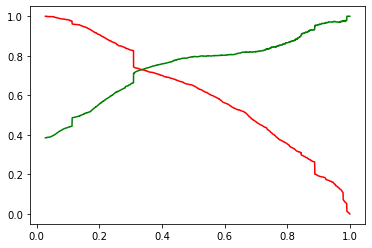

In [159]:
# plotting the precision and recall curves
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Predictions on the test set

In [160]:
#scaling test set
num_cols1=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols1] = scaler.fit_transform(X_test[num_cols1])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.058621,-0.108519,0.416452,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,-0.293797,-1.150166,-0.888077,-1.263530,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.143542,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,-0.293797,0.305228,-0.110357,0.976446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,-0.293797,1.396773,-0.433947,-0.283540,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [161]:
# Selecting the columns in X_train for X_test as well
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.108519,0,0,0,1,0,0,0,1,0
4050,-0.293797,-0.888077,1,0,0,0,1,0,0,1,0
7201,3.403712,0.420993,0,1,0,0,0,0,0,1,0
1196,-0.293797,-0.110357,0,0,0,1,0,0,0,1,0
8219,-0.293797,-0.433947,0,1,0,0,0,0,0,1,0


In [162]:
# Adding  a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2731, 12)

In [163]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)    

In [164]:
y_test_pred[:10]

3504    0.306096
4050    0.886499
7201    0.147829
1196    0.305665
8219    0.203766
8747    0.111534
9048    0.319527
6524    0.223440
7693    0.052311
8187    0.886499
dtype: float64

In [165]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [166]:
# verifying the first 5 rows of test set head
y_pred_1.head()

,0
3504,0.306096
4050,0.886499
7201,0.147829
1196,0.305665
8219,0.203766


In [167]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

In [168]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [169]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [170]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [171]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.306096
1,1,4050,0.886499
2,0,7201,0.147829
3,0,1196,0.305665
4,1,8219,0.203766


In [172]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [173]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.306096
1,1,4050,0.886499
2,0,7201,0.147829
3,0,1196,0.305665
4,1,8219,0.203766


#### Assigning Lead Score

In [174]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [175]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.306096,31
1,4050,1,0.886499,89
2,7201,0,0.147829,15
3,1196,0,0.305665,31
4,8219,1,0.203766,20


In [176]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [177]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.306096,31,1
1,4050,1,0.886499,89,1
2,7201,0,0.147829,15,0
3,1196,0,0.305665,31,1
4,8219,1,0.203766,20,0


In [178]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    865
0    177
Name: final_Predicted, dtype: int64

In [179]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

 <font color='brown'>Observations</font> : <br/>

From above we can see that final prediction of conversion have a target rate of 83% .


#### Overall Metrics - 
Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [180]:
# checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7751739289637496

In [181]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1252,  437],
       [ 177,  865]], dtype=int64)

In [182]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [183]:
# Calculating the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8301343570057581

In [184]:
#calculating the specificity
TN / float(TN+FP)

0.7412670219064535

#### Precision and recall metrics 

In [185]:
# Calculating the precision score
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6643625192012289

In [186]:
# Calculating the precision score
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8301343570057581

<font color='brown'>Observations</font> : <br/>
After running the model on the Test Data, below metrics are  obtained:

- Accuracy : 77.5%
- Sensitivity :83%
- Specificity : 74.12%

In [143]:
print("Features used in Final Model :", col1)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                                  -1.202002
Do Not Email                                           -0.360034
Total Time Spent on Website                             1.102320
Lead Origin_Lead Add Form                               4.611875
Lead Source_Direct Traffic                             -1.049608
Lead Source_Google                                     -0.780419
Lead Source_Organic Search                             -0.863852
Lead Source_Reference 

### <font color='Blue'>Conclusion</font> : <br/>

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of train set are around 77%, 83% and 73%. 
- Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 74% which are approximately closer to the respective values calculated using trained set.
- The lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
- Finally the obtained model seems to be good.


#### The variables that are important for  potential buyers are:
    - Total time spent on website
    - When the lead source are a.Google b.Direct Traffic c.Organic Search d.Reference e. Referral sites.
    - When Current occupations are a. Student b.Working professional c. Unemployed.
    - When Lead origin is Lead Add form.

--------------------------------------------------------------END--------------------------------------------------------------